In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Lectura de datos de enrtrada para el cálculo
s_parentpath=Path(r'C:\Alejo\ExtracciónDatos')
filepath=s_parentpath.joinpath(s_parentpath,'DatosConsumo.xlsx')

# Carga del nivel probabilístico del embalse
sheet_name='Consumo'
df_Esc=pd.read_excel(filepath, header=0,sheet_name=sheet_name)

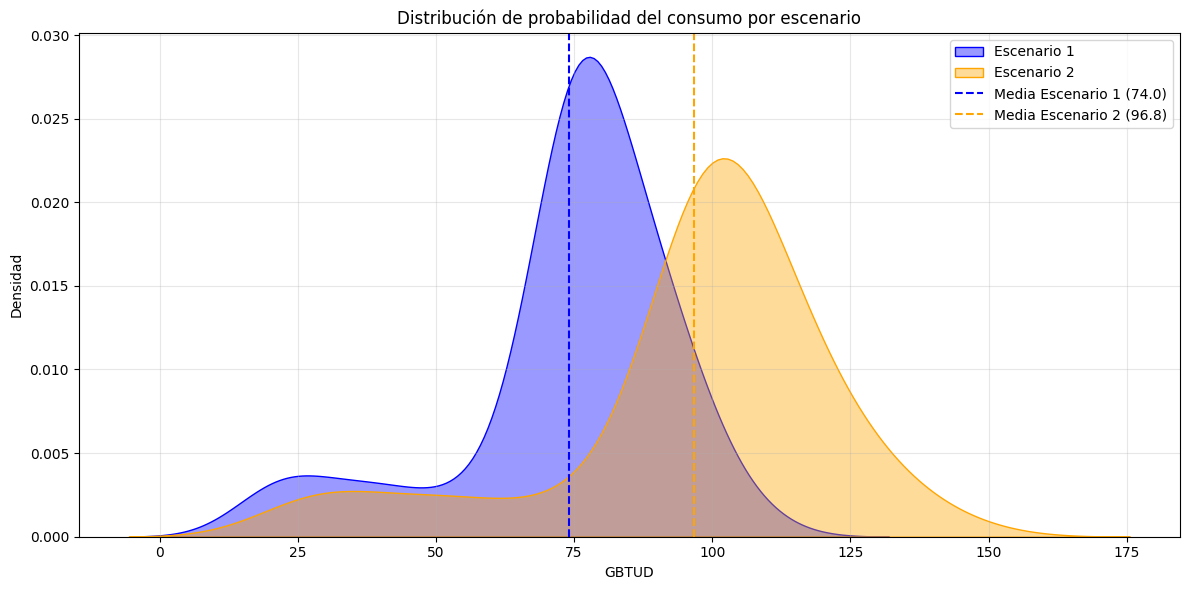

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes df_Esc cargado con las columnas:
# 'Escenario 1' y 'Escenario 2'

CAPACIDAD = 284  # cambia esto si tu capacidad es otra

fig, ax = plt.subplots(figsize=(12, 6))

# ============================
# KDE por escenario
# ============================
sns.kdeplot(
    data=df_Esc['Escenario 1'],
    fill=True, alpha=0.4, color='blue',
    label='Escenario 1',
    ax=ax
)

sns.kdeplot(
    data=df_Esc['Escenario 2'],
    fill=True, alpha=0.4, color='orange',
    label='Escenario 2',
    ax=ax
)

# ============================
# Líneas verticales en la media
# ============================
mean_esc1 = df_Esc['Escenario 1'].mean()
mean_esc2 = df_Esc['Escenario 2'].mean()

ax.axvline(mean_esc1, color='blue', linestyle='--', linewidth=1.5,
           label=f'Media Escenario 1 ({mean_esc1:.1f})')
ax.axvline(mean_esc2, color='orange', linestyle='--', linewidth=1.5,
           label=f'Media Escenario 2 ({mean_esc2:.1f})')

# ============================
# Línea de capacidad
# ============================
# ax.axvline(CAPACIDAD, color='red', linestyle='-', linewidth=2,
#            label=f'Capacidad ({CAPACIDAD} GBTUD)')

# ============================
# Etiquetas y formato
# ============================
ax.set_title('Distribución de probabilidad del consumo por escenario')
ax.set_xlabel('GBTUD')
ax.set_ylabel('Densidad')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()


In [2]:
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from pydataxm import *                           #Se realiza la importación de las librerias necesarias para ejecutar                        
from pydataxm.pydataxm import ReadDB as apiXM 
import datetime as dt                            
import pandas as pd
from pathlib import Path
import os

from google.cloud import bigquery
from google.oauth2 import service_account

In [4]:
FechaIni=dt.date(2023, 10,1)
FechaFin=dt.date(2025, 12, 31)

In [5]:
df_RecIni= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "ListadoRecursos",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta
df_RecIni['Values_Code']=df_RecIni['Values_Code'].astype(str)

# Units kWh, Descarga de la disponibilidad real
df_CENIni= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "CapEfecNeta",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Recurso",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)   

In [8]:
df_RecIni

,Id,Values_Code,Values_Name,Values_Type,Values_Disp,Values_RecType,Values_CompanyCode,Values_EnerSource,Values_OperStartdate,Values_State,Date
0,Sistema,2QBW,EL POPAL,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,ISGG,AGUA,2014-03-31,OPERACION,2026-01-22
1,Sistema,2QEK,SALTO II,HIDRAULICA,DESPACHADO CENTRALMENTE,FILO DE AGUA,ENDG,AGUA,2014-06-25,OPERACION,2026-01-22
2,Sistema,2QRL,LA REBUSCA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,GEN. DISTRIBUIDA,HZEG,AGUA,2014-07-24,OPERACION,2026-01-22
3,Sistema,2QV2,BAJO TULUA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,EPSG,AGUA,2015-01-30,OPERACION,2026-01-22
4,Sistema,2R22,LAGUNETA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,ENDG,AGUA,2014-12-17,OPERACION,2026-01-22
...,...,...,...,...,...,...,...,...,...,...,...
1436,Sistema,VNTB,VENTANA B,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,HDTG,AGUA,1957-11-01,OPERACION,2026-01-22
1437,Sistema,ZPA2,ZIPAEMG 2,TERMICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,CARBON,1964-01-01,OPERACION,2026-01-22
1438,Sistema,ZPA3,ZIPAEMG 3,TERMICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,CARBON,1976-01-01,OPERACION,2026-01-22
1439,Sistema,ZPA4,ZIPAEMG 4,TERMICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,CARBON,1981-04-01,OPERACION,2026-01-22


In [60]:
df_CEN=df_CENIni.copy()
df_CEN['Value']=df_CEN['Value']/1000
df_CEN.rename(columns={'Value': 'CEN'}, inplace=True)
df_CEN.drop(columns=['Date'], inplace=True)
df_CEN = df_CEN.drop_duplicates(subset='Code', keep='first')

df_Rec=df_RecIni.copy()

# df_CEN=df_CEN.merge(df_Rec,left_on=['Code'],right_on=['Values_Code'], how='left')[['Values_Name','Values_Type','Values_Disp','Values_RecType','Values_EnerSource','Values_State','CEN']]
# df_CEN=df_CEN[['Values_Name','Values_Type','Values_Disp','Values_State','CEN']]
# df_CEN=df_CEN.rename(columns={'Values_Name':'planta','Values_Type':'tipo','Values_Disp':'tipo_despacho','Values_State':'estado'})

df_Rec_CEN=df_Rec.merge(df_CEN,left_on=['Values_Code'],right_on=['Code'], how='inner')[['Values_Name','Values_Type','Values_Disp','Values_RecType','Values_EnerSource','Values_State','CEN']]
df_Rec_CEN=df_Rec_CEN[['Values_Name','Values_Type','Values_Disp','Values_State','CEN']]
df_Rec_CEN=df_Rec_CEN.rename(columns={'Values_Name':'planta','Values_Type':'tipo','Values_Disp':'tipo_despacho','Values_State':'estado'})

In [61]:
df_Rec_CEN['tipo'].unique()

array(['HIDRAULICA', 'TERMICA', 'COGENERADOR', 'SOLAR'], dtype=object)

### Bloque 0 — Preparación (recomendado antes de graficar)

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_Rec_CEN.copy()

# Limpieza básica
for c in ["planta", "tipo", "tipo_despacho", "estado"]:
    df[c] = df[c].astype(str).str.strip()

df["CEN"] = pd.to_numeric(df["CEN"], errors="coerce")
df = df.dropna(subset=["CEN"])

# (Opcional) normaliza mayúsculas si vienen mezcladas
df["tipo"] = df["tipo"].str.upper()
df["tipo_despacho"] = df["tipo_despacho"].str.upper()
df["estado"] = df["estado"].str.upper()

df.head()


,planta,tipo,tipo_despacho,estado,CEN
0,EL POPAL,HIDRAULICA,NO DESPACHADO CENTRALMENTE,OPERACION,19.9
1,SALTO II,HIDRAULICA,DESPACHADO CENTRALMENTE,OPERACION,35.0
2,LA REBUSCA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,OPERACION,0.7
3,BAJO TULUA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,OPERACION,19.9
4,LAGUNETA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,OPERACION,18.0


### Bloque 1 — CEN total por tipo de recurso (mínimo requerido

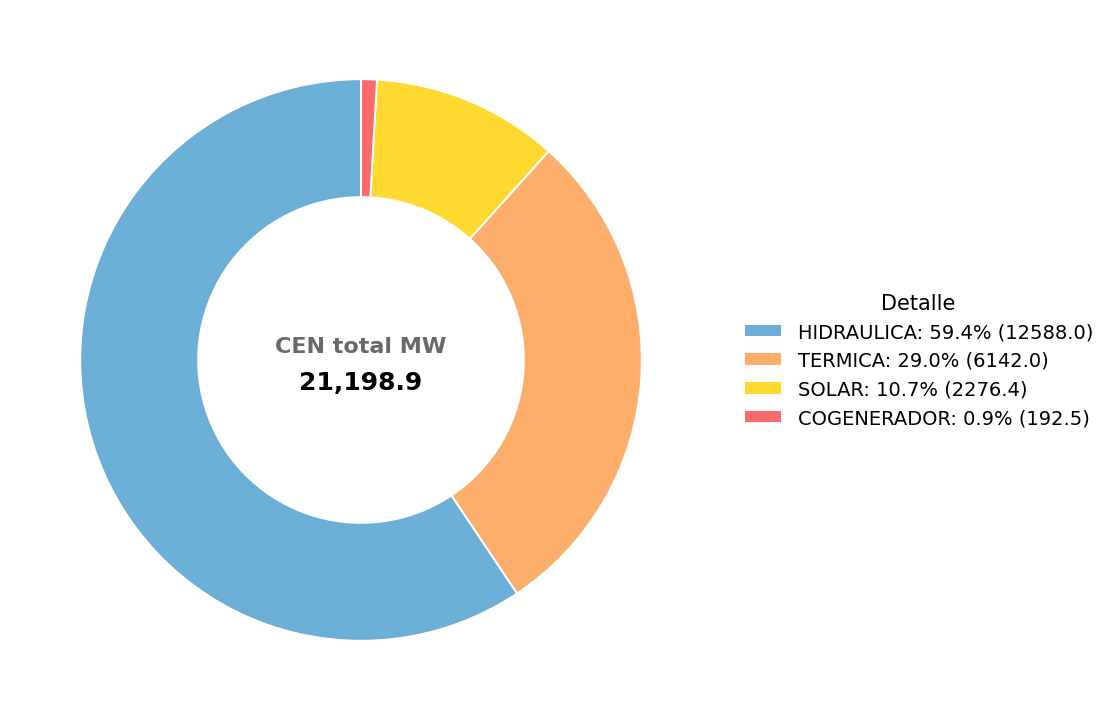

In [67]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({
    "font.size": 16,
    "font.family": "sans-serif",
    "axes.titlesize": 22,
    "axes.titleweight": "bold"
})

cen_por_tipo = (
    df.groupby("tipo", as_index=False)["CEN"].sum().round(1)
      .sort_values("CEN", ascending=False)
)

cen_total = cen_por_tipo["CEN"].sum().round(1)

color_map = {
    "HIDRAULICA": "#6BAED6",
    "TERMICA":    "#FDAE6B",
    "SOLAR":      "#FFD92F",
    "COGENERADOR":"#FB6A6A"
}
colors = [color_map.get(t, "#CCCCCC") for t in cen_por_tipo["tipo"]]

vals = cen_por_tipo["CEN"].values
labels = cen_por_tipo["tipo"].values
pcts = 100 * vals / vals.sum()

# Leyenda enriquecida
legend_labels = [f"{lab}: {pct:.1f}% ({val:.1f})" for lab, pct, val in zip(labels, pcts, vals)]

fig, ax = plt.subplots(figsize=(10.5, 7.5))

wedges, _ = ax.pie(
    vals,
    colors=colors,
    startangle=90,
    labels=None,                 # SIN labels alrededor
    wedgeprops=dict(width=0.42, edgecolor="white", linewidth=1.4)  # donut
)

# Total al centro
ax.text(0, 0.05, "CEN total MW", ha="center", va="center", fontsize=16, color="dimgray", fontweight="bold")
ax.text(0, -0.08, f"{cen_total:,.1f}", ha="center", va="center", fontsize=18, fontweight="bold")

# ax.set_title("Participación de CEN por tipo de recurso", pad=18)
# ax.axis("equal")

# Leyenda a la derecha
ax.legend(
    wedges, legend_labels,
    title="Detalle",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False,
    fontsize=14,
    title_fontsize=15
)

plt.tight_layout()
plt.show()




### Bloque 2 — Donut + leyenda (CEN por tipo de despacho)

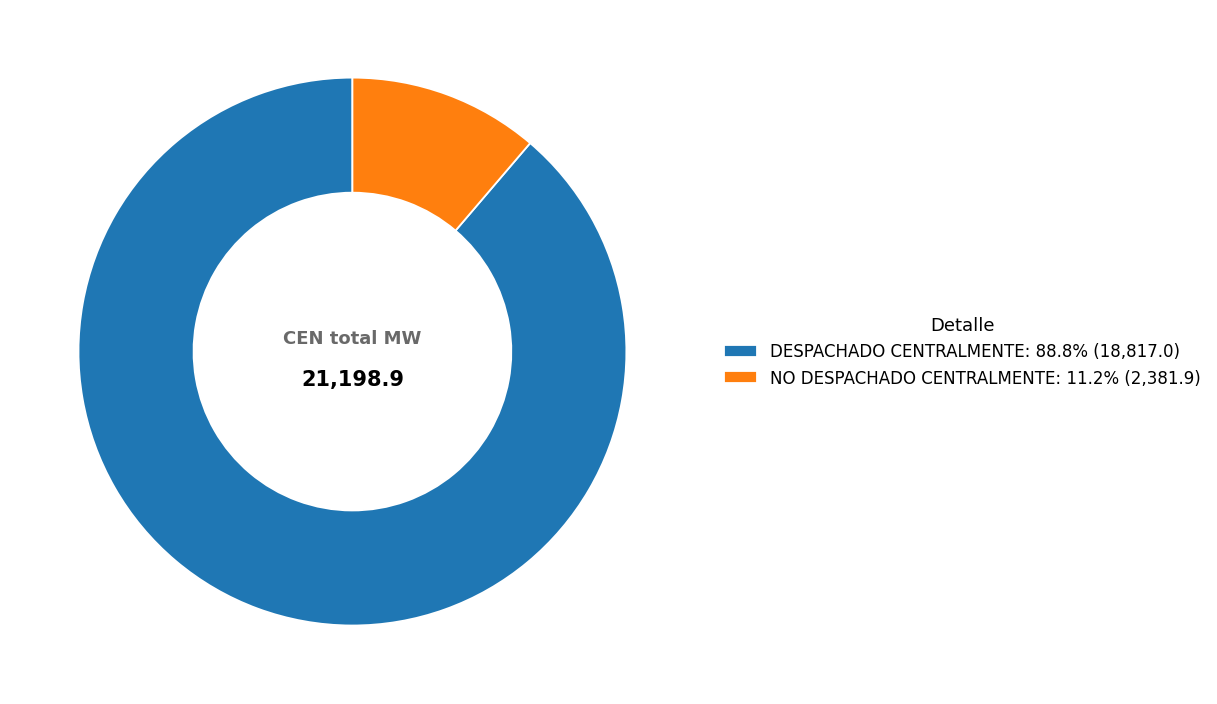

,tipo_despacho,CEN
0,DESPACHADO CENTRALMENTE,18817.00000
1,NO DESPACHADO CENTRALMENTE,2381.90687


In [69]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({
    "font.size": 14,
    "font.family": "sans-serif",
    "axes.titlesize": 20,
    "axes.titleweight": "bold"
})

cen_por_despacho = (
    df.groupby("tipo_despacho", as_index=False)["CEN"].sum()
      .sort_values("CEN", ascending=False)
)

vals = cen_por_despacho["CEN"].values
labels = cen_por_despacho["tipo_despacho"].values
total = vals.sum()
pcts = 100 * vals / total

legend_labels = [f"{lab}: {pct:.1f}% ({val:,.1f})" for lab, pct, val in zip(labels, pcts, vals)]

fig, ax = plt.subplots(figsize=(11, 7.5))
wedges, _ = ax.pie(
    vals,
    startangle=90,
    labels=None,
    wedgeprops=dict(width=0.42, edgecolor="white", linewidth=1.3)
)

ax.text(0, 0.05, "CEN total MW", ha="center", va="center", fontsize=13, color="dimgray", fontweight="bold")
ax.text(0, -0.10, f"{total:,.1f}", ha="center", va="center", fontsize=15, fontweight="bold")

# ax.set_title("Participación de CEN por tipo de despacho", pad=16)
# ax.axis("equal")

ax.legend(
    wedges, legend_labels,
    title="Detalle",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False,
    fontsize=12,
    title_fontsize=13
)

plt.tight_layout()
plt.show()

cen_por_despacho


### Bloque 3 — Barras horizontales con etiquetas (CEN por estado)

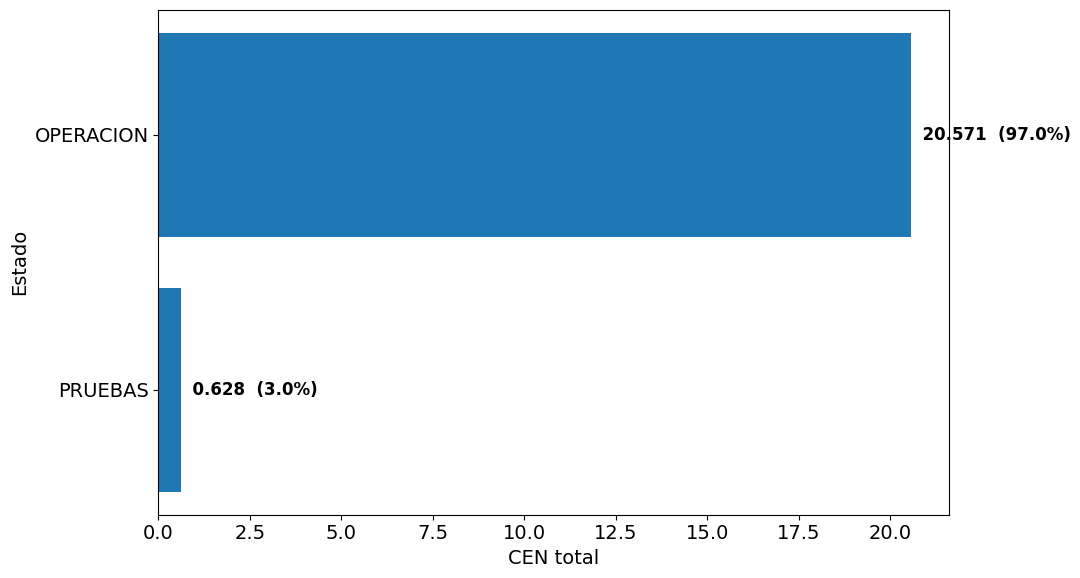

,estado,CEN,pct
0,OPERACION,20.571283,97.039357
1,PRUEBAS,0.627624,2.960643


In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({
    "font.size": 14,
    "font.family": "sans-serif",
    "axes.titlesize": 20,
    "axes.titleweight": "bold"
})

cen_por_estado = (
    df.groupby("estado", as_index=False)["CEN"].sum()
      .sort_values("CEN", ascending=True)
)

total = cen_por_estado["CEN"].sum()
cen_por_estado["pct"] = 100 * cen_por_estado["CEN"] / total

fig, ax = plt.subplots(figsize=(11, 6))
ax.barh(cen_por_estado["estado"], cen_por_estado["CEN"])

# Título opcional (si lo quieres, descomenta)
# ax.set_title("CEN por estado", pad=12)

ax.set_xlabel("CEN total")
ax.set_ylabel("Estado")

# Etiquetas de valor + porcentaje
for i, (val, pct) in enumerate(zip(cen_por_estado["CEN"], cen_por_estado["pct"])):
    ax.text(
        val, i,
        f"  {val:,.3f}  ({pct:.1f}%)",
        va="center",
        fontsize=12,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()

cen_por_estado.sort_values("CEN", ascending=False)



### Barras apiladas para el estado y tipo

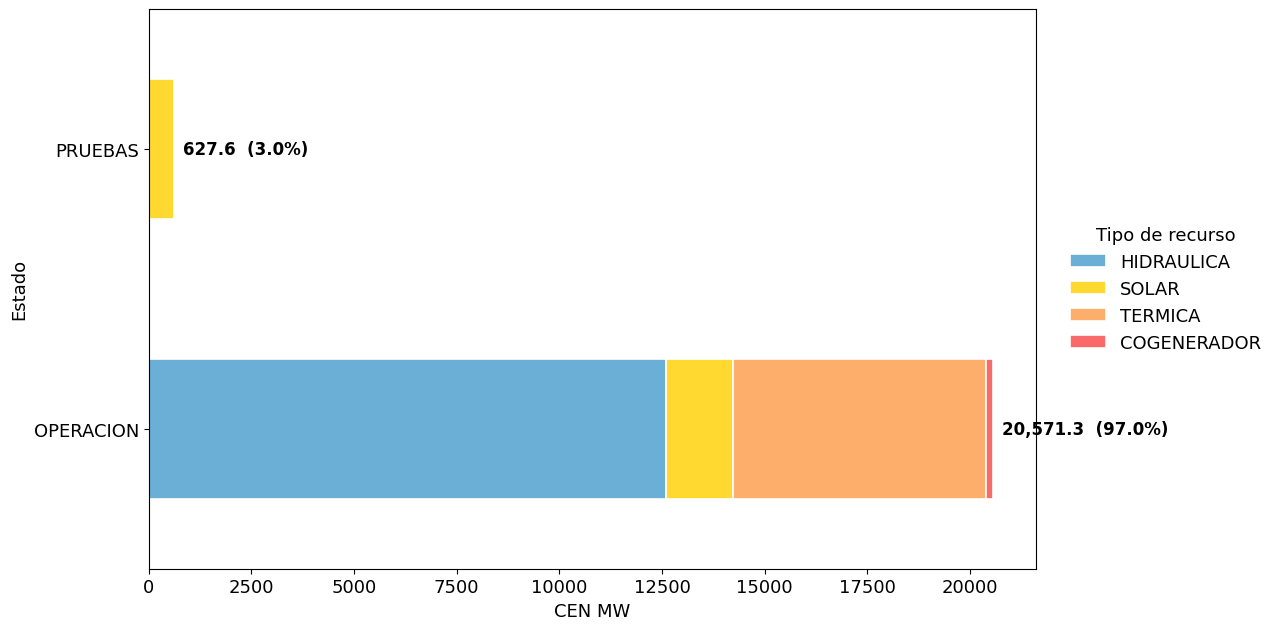

,CEN_total_estado,share_%
estado,,
OPERACION,20571.28287,97.039357
PRUEBAS,627.62400,2.960643


In [72]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

mpl.rcParams.update({
    "font.size": 13,
    "font.family": "sans-serif",
    "axes.titlesize": 20,
    "axes.titleweight": "bold"
})

# Pivot: Estado vs Tipo (CEN suma)
pivot_estado_tipo = (
    df.pivot_table(
        index="estado",
        columns="tipo",
        values="CEN",
        aggfunc="sum",
        fill_value=0.0
    )
)

# Orden de columnas (para que coincida con tus colores)
order_cols = ["HIDRAULICA", "SOLAR", "TERMICA", "COGENERADOR"]
for c in order_cols:
    if c not in pivot_estado_tipo.columns:
        pivot_estado_tipo[c] = 0.0
pivot_estado_tipo = pivot_estado_tipo[order_cols]

# Colores claros solicitados
color_map = {
    "HIDRAULICA":  "#6BAED6",  # azul claro
    "SOLAR":       "#FFD92F",  # amarillo
    "TERMICA":     "#FDAE6B",  # naranja claro
    "COGENERADOR": "#FB6A6A"   # rojo claro
}
colors = [color_map[c] for c in pivot_estado_tipo.columns]

# Totales por estado y participación (%)
tot_estado = pivot_estado_tipo.sum(axis=1)
total_general = tot_estado.sum()
share_estado = 100 * tot_estado / total_general

# Plot
fig, ax = plt.subplots(figsize=(13, 6.5))

pivot_estado_tipo.plot(
    kind="barh",
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor="white",
    linewidth=1.2
)

# ax.set_title("Composición de CEN por estado y tipo de recurso", pad=12)
ax.set_xlabel("CEN MW")
ax.set_ylabel("Estado")

# Etiqueta al final de cada barra: total y % de participación
xmax = tot_estado.max()
offset = 0.01 * xmax if xmax > 0 else 0.01

for i, estado in enumerate(pivot_estado_tipo.index):
    total_e = tot_estado.loc[estado]
    pct_e = share_estado.loc[estado]
    ax.text(
        total_e + offset, i,
        f"{total_e:,.1f}  ({pct_e:.1f}%)",
        va="center",
        fontsize=12,
        fontweight="bold",
        color="black"
    )

# Leyenda limpia a la derecha
ax.legend(
    title="Tipo de recurso",
    bbox_to_anchor=(1.02, 0.5),
    loc="center left",
    frameon=False
)

plt.tight_layout()
plt.show()

# (Opcional) tabla resumen para validar números
resumen_estado = (
    pd.DataFrame({
        "CEN_total_estado": tot_estado,
        "share_%": share_estado
    })
    .sort_values("CEN_total_estado", ascending=False)
)
resumen_estado




### Datos de demanda regualada y no regulada

In [42]:
FechaIni=dt.date(2023, 10,1)
FechaFin=dt.date(2025, 12, 31)

In [43]:
df_DemRegIni= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "DemaRealReg",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)      #Corresponde a la fecha final de la consulta
# df_RecIni['Values_Code']=df_RecIni['Values_Code'].astype(str)

# Units kWh, Descarga de la disponibilidad real
df_DemNoRegIni= apiXM.request_data(pydataxm.ReadDB(),    #Se indica el objeto que contiene el serivicio
                        "DemaRealNoReg",                #Se indica el nombre de la métrica tal como se llama en el campo metricID
                        "Sistema",                 #Campo que indica si es Sistema, Agente, Recurso, Comercializador
                        FechaIni,       #Corresponde a la fecha inicial de la consulta
                        FechaFin)   

In [55]:
df_DemReg=df_DemRegIni.copy()
df_DemNoReg=df_DemNoRegIni.copy()


l_per=[]
for i in range(1,25):
    if i<10:
        df_DemReg.rename(columns={'Values_Hour0' + str(i): i}, inplace=True)
        df_DemNoReg.rename(columns={'Values_Hour0' + str(i): i}, inplace=True)
        l_per.append(i)
    else:
        df_DemReg.rename(columns={'Values_Hour' + str(i): i}, inplace=True)
        df_DemNoReg.rename(columns={'Values_Hour' + str(i): i}, inplace=True)
        l_per.append(i)

# Converti columnas de periodos en una sola columna
df_DemReg = df_DemReg.melt(id_vars=['Values_code', 'Date'], value_vars=l_per,var_name='periodo',value_name='Dem')
df_DemReg['periodo'] = df_DemReg['periodo'].astype(int)

df_DemNoReg = df_DemNoReg.melt(id_vars=['Values_code', 'Date'], value_vars=l_per,var_name='periodo',value_name='Dem')
df_DemNoReg['periodo'] = df_DemNoReg['periodo'].astype(int)

df_DemReg = df_DemReg.groupby(['Date', 'periodo'], as_index=False)['Dem'].sum().round(2)
df_DemReg['Dem']=(df_DemReg['Dem']/1000000).round(2)

df_DemNoReg = df_DemNoReg.groupby(['Date', 'periodo'], as_index=False)['Dem'].sum().round(2)
df_DemNoReg['Dem']=(df_DemNoReg['Dem']/1000000).round(2)

df_DemReg['Date'] = pd.to_datetime(df_DemReg['Date']).dt.date

df_DemNoReg['Date'] = pd.to_datetime(df_DemNoReg['Date']).dt.date

df_DemReg['year'] = pd.to_datetime(df_DemReg['Date']).dt.year
df_DemNoReg['year'] = pd.to_datetime(df_DemNoReg['Date']).dt.year


df_DemReg['mes'] = pd.to_datetime(df_DemReg['Date']).dt.month
df_DemNoReg['mes'] = pd.to_datetime(df_DemNoReg['Date']).dt.month

df_DemReg['year-mes']=df_DemReg['year'].astype(str) + '-' + df_DemReg['mes'].astype(str) 
df_DemNoReg['year-mes']=df_DemNoReg['year'].astype(str) + '-' + df_DemNoReg['mes'].astype(str) 


In [59]:
# Combinar demanda regulada y no regulada por año-mes
df_DemReg_por_mes = df_DemReg.groupby(['year-mes','year','mes'], as_index=False)['Dem'].sum().round(2)
df_DemReg_por_mes.rename(columns={'Dem': 'Dem_Regulada'}, inplace=True)

df_DemNoReg_por_mes = df_DemNoReg.groupby(['year-mes','year','mes'], as_index=False)['Dem'].sum().round(2)
df_DemNoReg_por_mes.rename(columns={'Dem': 'Dem_NoRegulada'}, inplace=True)

# Juntar ambos dataframes
df_Dem_por_mes = df_DemReg_por_mes.merge(df_DemNoReg_por_mes, on=['year-mes','year','mes'], how='inner')

# Calcular demanda total
df_Dem_por_mes['Dem_Total'] = (df_Dem_por_mes['Dem_Regulada'] + df_Dem_por_mes['Dem_NoRegulada']).round(2)

df_Dem_por_mes.to_csv('DemandaRegyNoReg.csv',index=False)